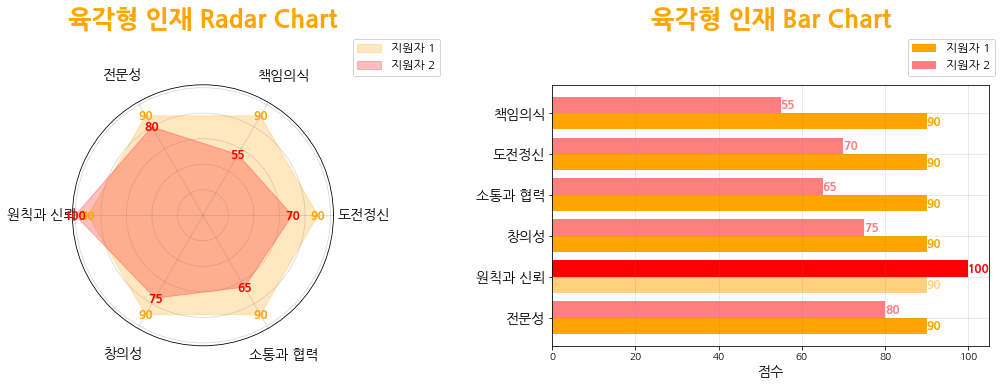

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

def radar_chart(ax, categories, data, title="Radar Chart"):
    num_categories = len(categories)

    # 각 데이터 값을 원형에 맞게 배치
    angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()
    data = [case_data + [case_data[0]] for case_data in data]  # 각 데이터의 처음 값 복사해서 마지막에 추가
    angles += angles[:1]

    # Matplotlib에서 한글을 사용하려면 폰트를 설정
    plt.rcParams['font.family'] = 'NanumGothic'
    ax = plt.subplot(ax, polar=True)
    

    # 레이더 차트 그리기
    colors = ['orange', 'r']
    for i, (case_data, color) in enumerate(zip(data, colors)):
        ax.fill(angles, case_data, color=color, alpha=0.25, label=f'지원자 {i+1}')
        
        # 데이터 레이블 추가
        for angle, value in zip(angles[:-1], case_data[:-1]):
            x = np.degrees(angle)
            y = value
            ax.text(angle, value, f'{value}', ha='center', va='center', fontsize=12, color=color, weight='bold')


    ax.set_yticklabels([], fontsize=14)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=14)
    ax.tick_params(axis='y', pad=20)
    ax.tick_params(axis='x', pad=20)
    ax.grid(color='grey',alpha=0.3)
    
    
    ax.set_title(title, size=25, color='orange', y=1.2, weight='bold')
    
    # 범례 추가
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.2), fontsize=12)

def bar_chart(ax, categories, data, title="Bar Chart"):
    ax = plt.subplot(ax)
    colors = ['orange', 'r']
    
    # 하드코딩된 순서로 categories 정의
    ordered_categories = [ '책임의식', '도전정신', '소통과 협력', '창의성', '원칙과 신뢰', '전문성' ]
    
    bar_width = 0.4
    for i, (case_data, color) in enumerate(zip(data, colors)):
        positions = np.arange(len(ordered_categories))[::-1] + i * bar_width
        
        # 특정 category 값이 크면 해당 막대의 alpha 값을 1로 설정
        alpha_values = [1 if case_data[categories.index(cat)] >= data[1-i][categories.index(cat)] else 0.5 for cat in ordered_categories]
        
        # 막대 그리기
        bars = ax.barh(positions, [case_data[categories.index(cat)] for cat in ordered_categories],
                       height=bar_width, color=color, label=f'지원자 {i+1}')
        
        # 데이터 레이블 및 막대의 alpha값 추가
        for bar, pos, value, alpha in zip(bars, positions, [case_data[categories.index(cat)] for cat in ordered_categories], alpha_values):
            ax.text(value, pos, f'{value}', ha='left', va='center', fontsize=12, color=color, weight='bold', alpha=alpha)
            bar.set_alpha(alpha)

    ax.set_yticks(np.arange(len(ordered_categories))[::-1] + bar_width / 2)
    ax.set_yticklabels(ordered_categories, fontsize=14)
    ax.set_xlabel('점수', fontsize=14)
    ax.set_title(title, size=25, color='orange', y=1.2, weight='bold')
    ax.grid(color='grey',alpha=0.2)
    
    # 범례 추가
    ax.legend(loc='upper left', bbox_to_anchor=(0.8, 1.2), fontsize=12)

# 데이터
# 2022-03-02 10:30 전자신문 mz세대가 채용시장 주축, 책임감 있는 인재 선호. 538개 기업 설문조사(사람인)
categories = ['도전정신', '책임의식', '전문성', '원칙과 신뢰', '창의성', '소통과 협력']
data = [
    [90, 90, 90, 90, 90, 90],  # 지원자 1
    [70, 55, 80, 100, 75, 65]]  # 지원자 2

# 1행 2열의 subplot 생성
fig = plt.figure(figsize=(18, 5))
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1, 1], wspace=0.3)

# radar_chart 함수로 (1, 1) 위치에 레이더 차트 그리기
radar_chart(gs[0], categories, data, title="육각형 인재 Radar Chart")

# bar_chart 함수로 (1, 2) 위치에 가로 막대그래프 그리기
bar_chart(gs[1], categories, data, title="육각형 인재 Bar Chart")

# adjust space between title and charts
plt.subplots_adjust(top=0.85)
plt.show()# 예제 데이터
